In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import math 
import seaborn as sea
import statistics

In [2]:
path = "BankChurners.csv"
bank = pd.read_csv(path)

In [3]:
use_colm = ["CLIENTNUM","Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

In [4]:
numerical_data = []
categorical_data = []
types = bank.dtypes
names = list(bank.columns)
names2 = []
for i in range(0,len(types)):
    if types[i] == 'int64' :
        numerical_data.append(names[i])
        names2.append(names[i])
    elif types[i] == 'float64':
        numerical_data.append(names[i])
        names2.append(names[i])
    elif types[i] == 'object':
        categorical_data.append(names[i])
        
print(bank[numerical_data].head())
print(bank[categorical_data].head())

   CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0  768805383            45                3              39   
1  818770008            49                5              44   
2  713982108            51                3              36   
3  769911858            40                4              34   
4  709106358            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.3

In [5]:
bank[use_colm].head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
#identify data types and values (numeric, categorical, ordinal)
numeric_data = ["CLIENTNUM","Customer_Age","Months_on_book","Credit_Limit","Total_Revolving_Bal",
                     "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Avg_Utilization_Ratio",
                     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
categorical_data = ["Attrition_Flag","Gender","Marital_Status"]
ordinal_data = ["Dependent_count", "Education_Level", "Income_Category", "Card_Category", "Total_Relationship_Count", 
                "Months_Inactive_12_mon", "Contacts_Count_12_mon"]


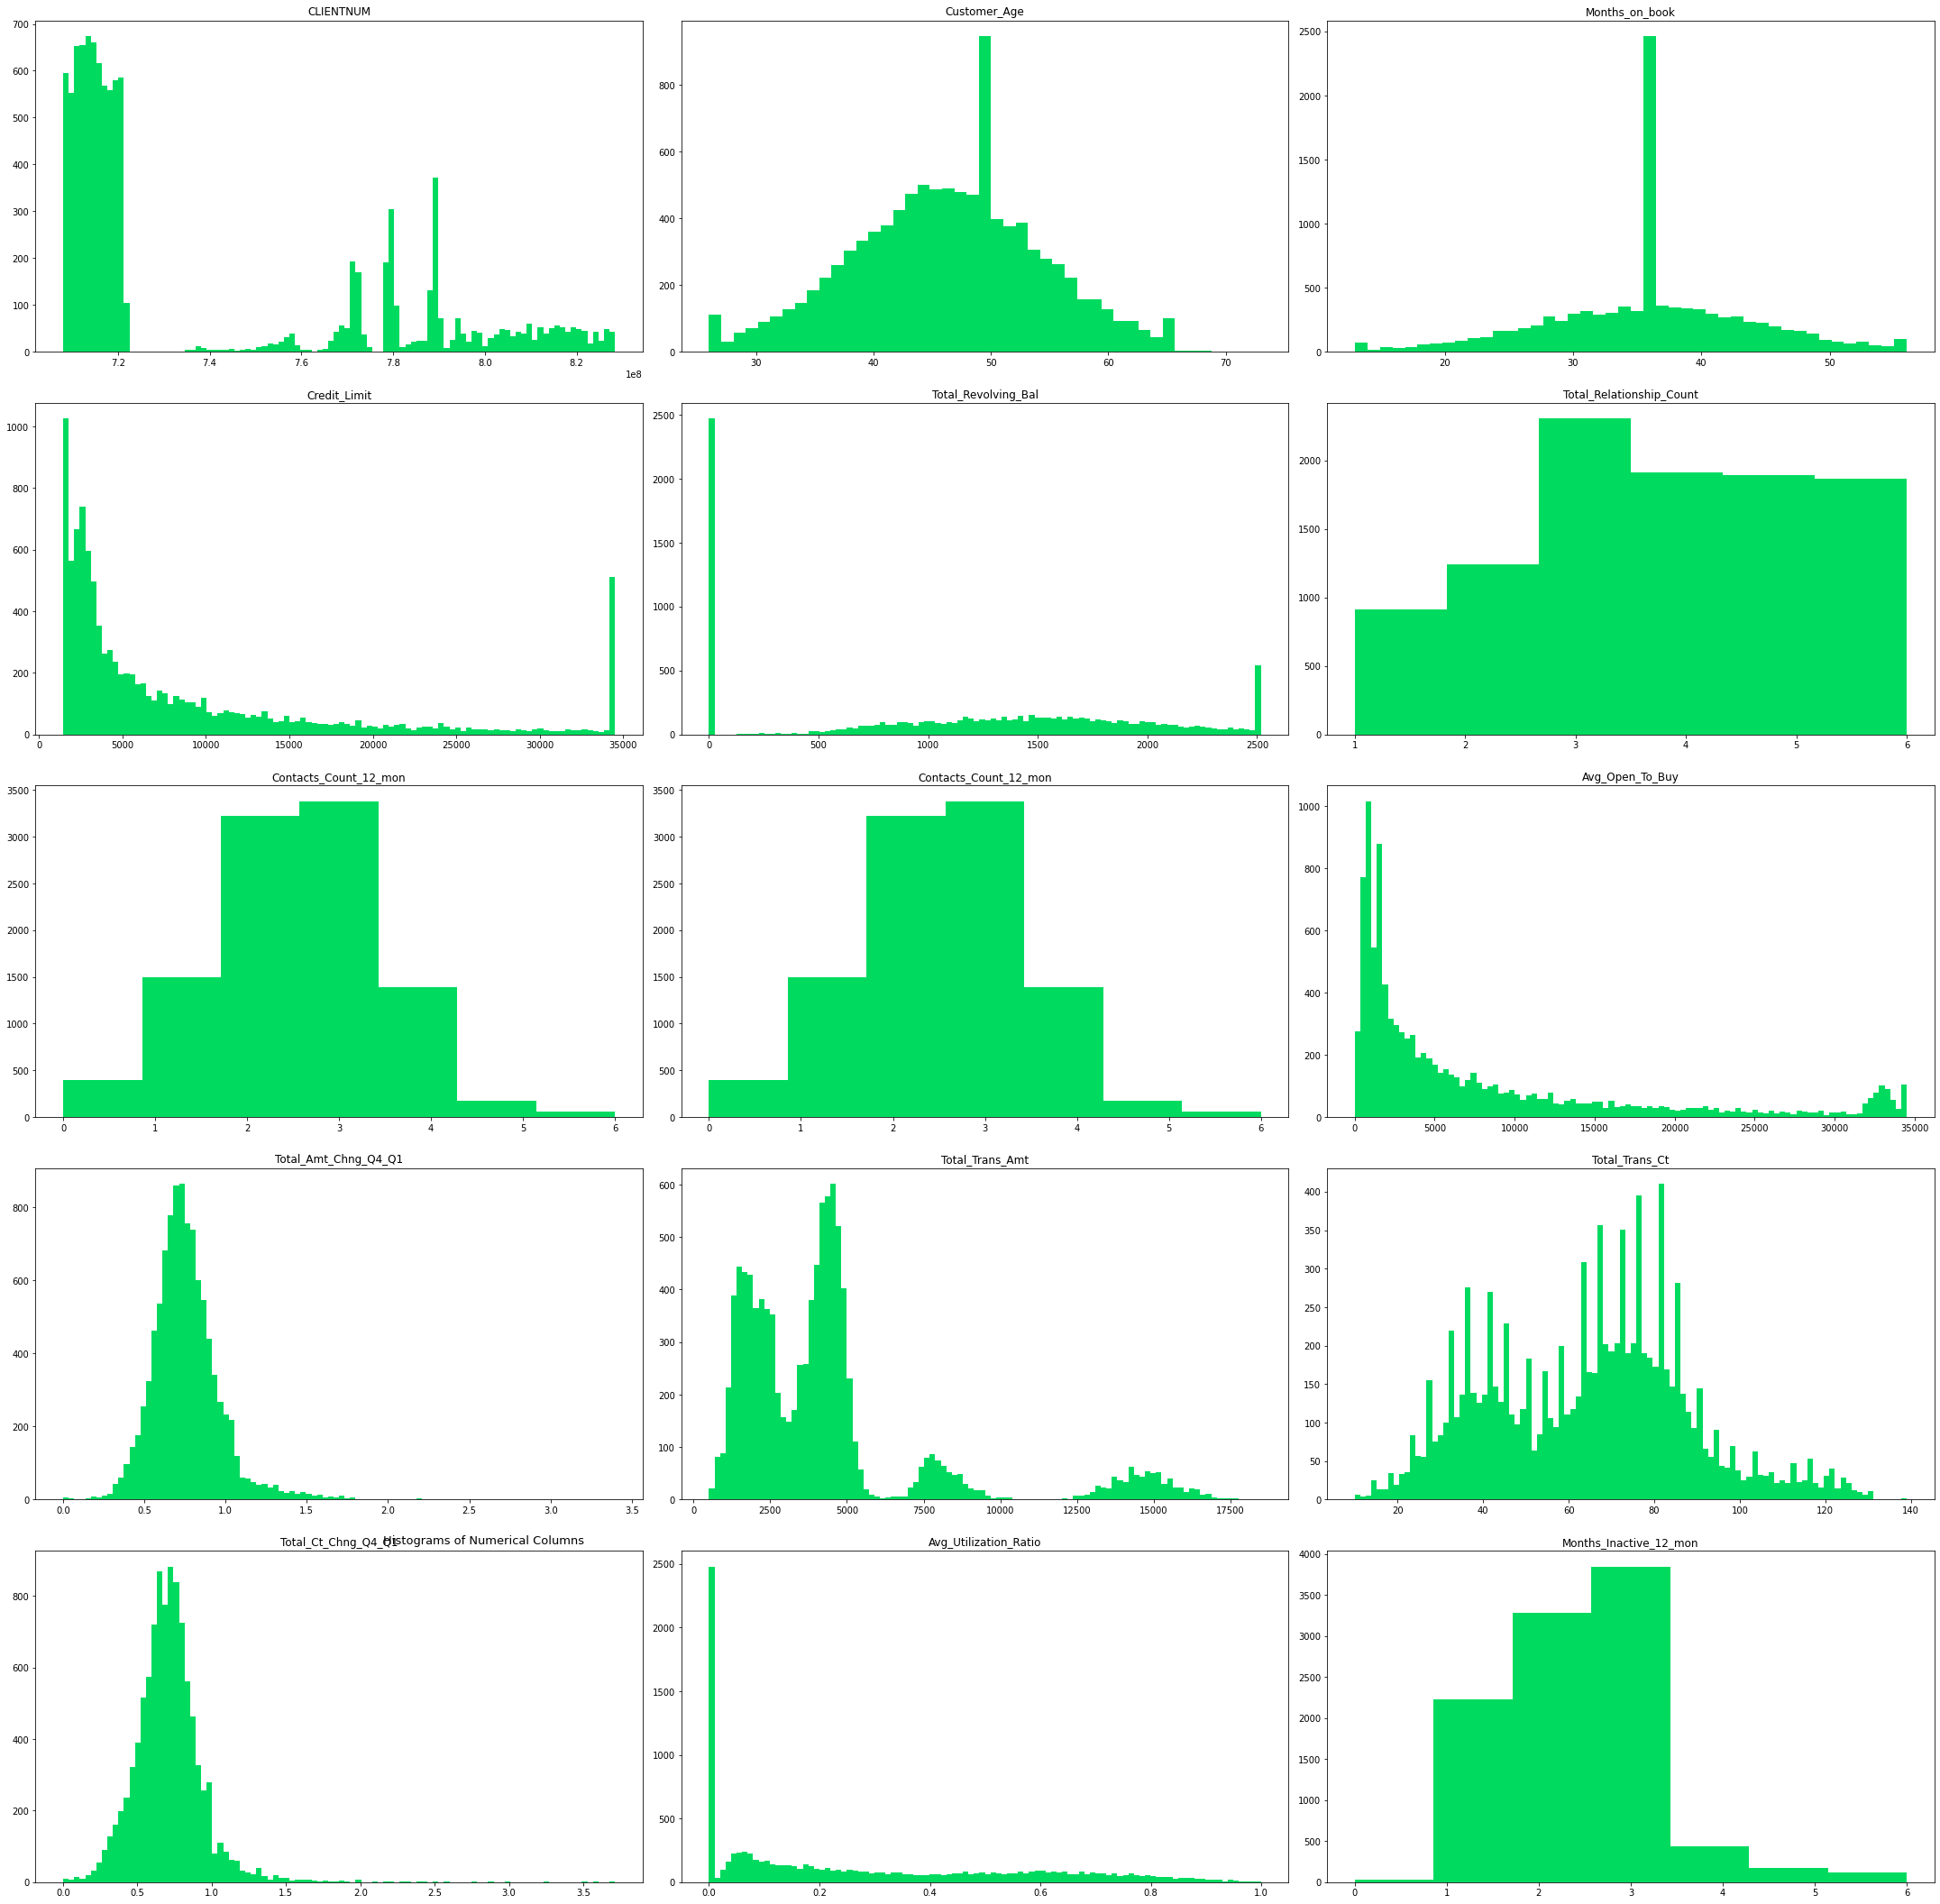

In [7]:
#Histogram:
headers = ["CLIENTNUM","Customer_Age","Months_on_book","Credit_Limit","Total_Revolving_Bal","Total_Relationship_Count","Contacts_Count_12_mon","Contacts_Count_12_mon",
                     "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio",
                     "Months_Inactive_12_mon"]
    
fig = mpl.figure(figsize=(15, 12))
mpl.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 13, fontfamily = "sans-serif")
for i in range(bank[headers].shape[1]):   
    mpl.subplot(6, 3, i + 1) 
    f = mpl.gca()
    f.set_title(bank[headers].columns.values[i])
    vals = np.size(bank[headers].iloc[:, i].unique())
    if vals >= 100:
        vals = 100 
    
    mpl.hist(bank[headers].iloc[:, i], bins=vals, color = '#00DB60')
    mpl.tight_layout(rect=[0, 0.03, 2, 3])

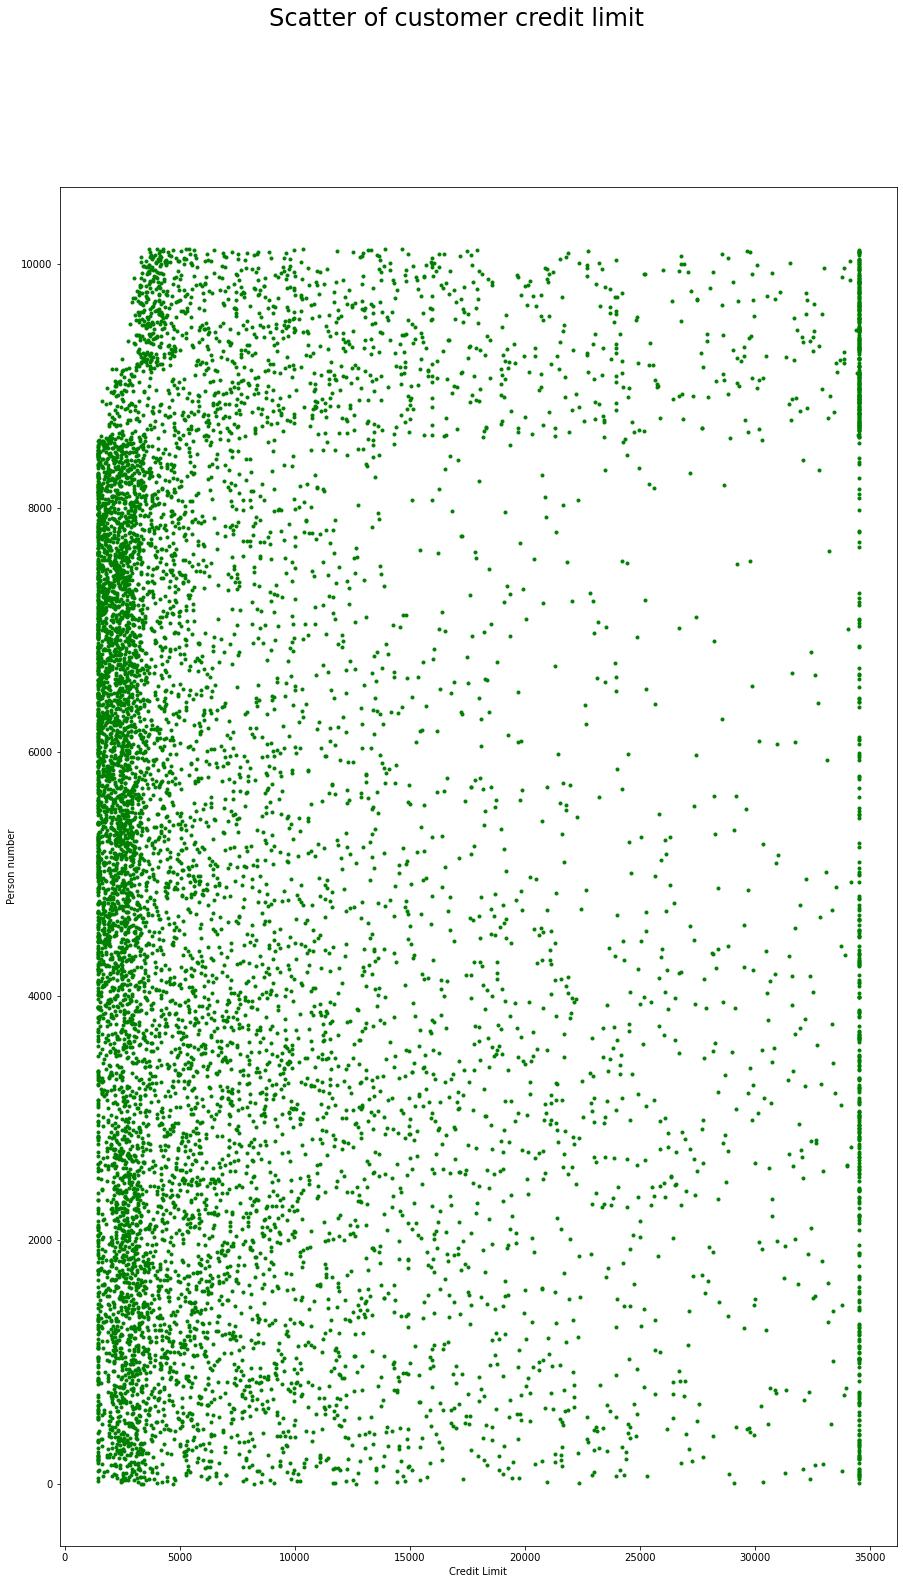

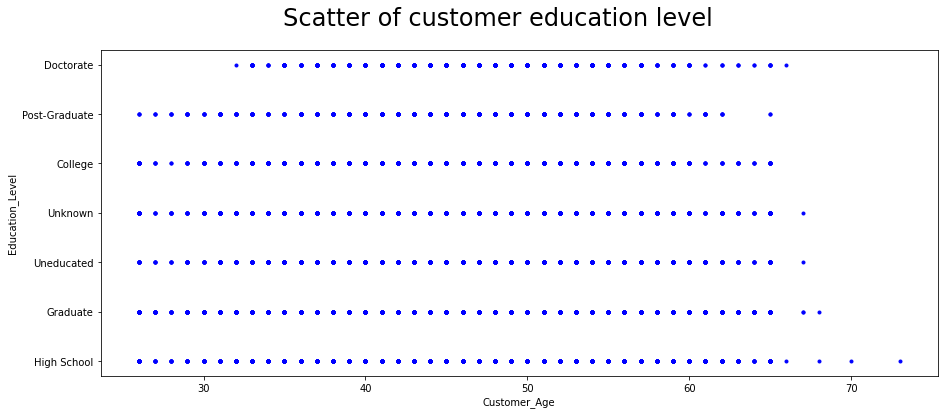

In [8]:
fig, ax = mpl.subplots(figsize=(15, 25))
mpl.suptitle('Scatter of customer credit limit  \n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
ax.scatter(x = bank['Credit_Limit'], y = range(len(bank)), marker = ".", color = "Green")
mpl.xlabel("Credit Limit")
mpl.ylabel("Person number")
mpl.show()

fig, ax = mpl.subplots(figsize=(15, 6))
mpl.suptitle('Scatter of customer education level  \n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
ax.scatter(x = bank['Customer_Age'], y = bank['Education_Level'], marker = ".", color = "Blue")
mpl.xlabel("Customer_Age")
mpl.ylabel("Education_Level")
mpl.show()

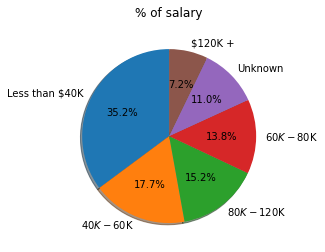

In [9]:
quantity = []
info = bank["Income_Category"].value_counts()
for i in range (0,len(info)):
    quantity.append(info[i])

mpl.pie(quantity, explode = None, labels = list(info.keys()), autopct = '%0.1f%%', shadow = True, startangle = 90)
mpl.title("% of salary", y=1.02);
mpl.show()

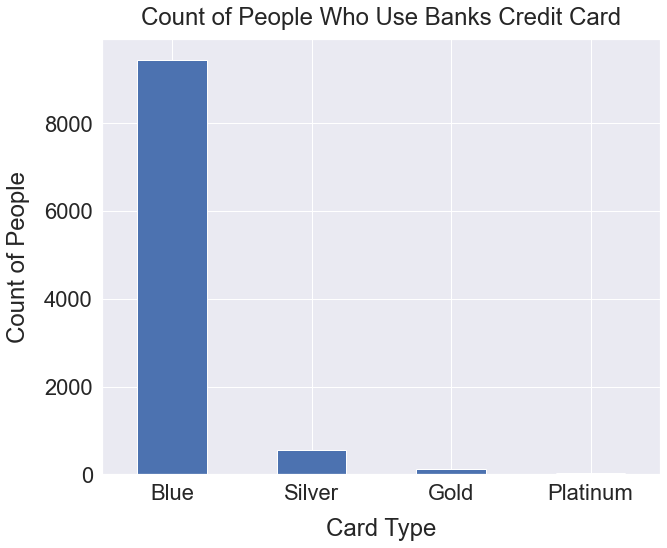

In [10]:
sea.set(font_scale=2)
bank['Card_Category'].value_counts().plot(kind='bar', figsize=(10,8), rot=0)
mpl.xlabel("Card Type", labelpad=14)
mpl.ylabel("Count of People", labelpad=14)
mpl.title("Count of People Who Use Banks Credit Card", y=1.02);

In [11]:
#mean
names = list(bank.columns)
for i in range(0,len(names)):
    try:
        var = bank[names[i]]
        ans = statistics.mean(var)
        print('Mean of {0} = {1}'.format(names[i],ans))
    except TypeError:
        continue
print("\n")
for i in range(0,len(names)):
    try:
        mean = bank[names[i]].value_counts()
        keys = list(mean.keys())
        print(keys[0], mean[keys[0]])
    except TypeError:
        continue

Mean of CLIENTNUM = 739177606.3336625
Mean of Customer_Age = 46.32596030413745
Mean of Dependent_count = 2.3462032191172115
Mean of Months_on_book = 35.928409203120374
Mean of Total_Relationship_Count = 3.8125802310654686
Mean of Months_Inactive_12_mon = 2.3411671768539546
Mean of Contacts_Count_12_mon = 2.4553174681544387
Mean of Credit_Limit = 8631.953698034957
Mean of Total_Revolving_Bal = 1162.8140614199665
Mean of Avg_Open_To_Buy = 7469.139636614989
Mean of Total_Amt_Chng_Q4_Q1 = 0.759940653698035
Mean of Total_Trans_Amt = 4404.086303939963
Mean of Total_Trans_Ct = 64.85869457884863
Mean of Total_Ct_Chng_Q4_Q1 = 0.7122223758269971
Mean of Avg_Utilization_Ratio = 0.2748935518909845
Mean of Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 = 0.1599974639787795
Mean of Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 = 0.84

In [12]:
#standard_deviation 
names = list(bank.columns)
for k in range(0,len(names)):
    try:
        nu = bank[names[k]]
        summ_nu = 0
        summ_sigma = 0
        for i in range(len(nu)):
            summ_nu += nu[i]
        nu_res = summ_nu/len(nu)
        for i in range(len(nu)):
            summ_sigma += ((nu[i] - nu_res)*(nu[i] - nu_res))
        sigma_res = math.sqrt(summ_sigma/len(nu))
        print(use_colm[k], sigma_res)
    except TypeError:
        continue

CLIENTNUM 36901961.35610058
Customer_Age 8.016418208911816
Dependent_count 1.2988442163662206
Months_on_book 7.98602200809617
Total_Relationship_Count 1.5543311177215726
Months_Inactive_12_mon 1.010572500763701
Contacts_Count_12_mon 1.1061705236740695
Credit_Limit 9088.327899308171
Total_Revolving_Bal 814.9470959025319
Avg_Open_To_Buy 9090.236478524997
Total_Amt_Chng_Q4_Q1 0.21919594607572362
Total_Trans_Amt 3396.9615230781246
Total_Trans_Ct 23.471411510261337
Total_Ct_Chng_Q4_Q1 0.23807433602687225
Avg_Utilization_Ratio 0.2756778572115401
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 0.3652829759417016
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 0.3652830006701898


<AxesSubplot:>

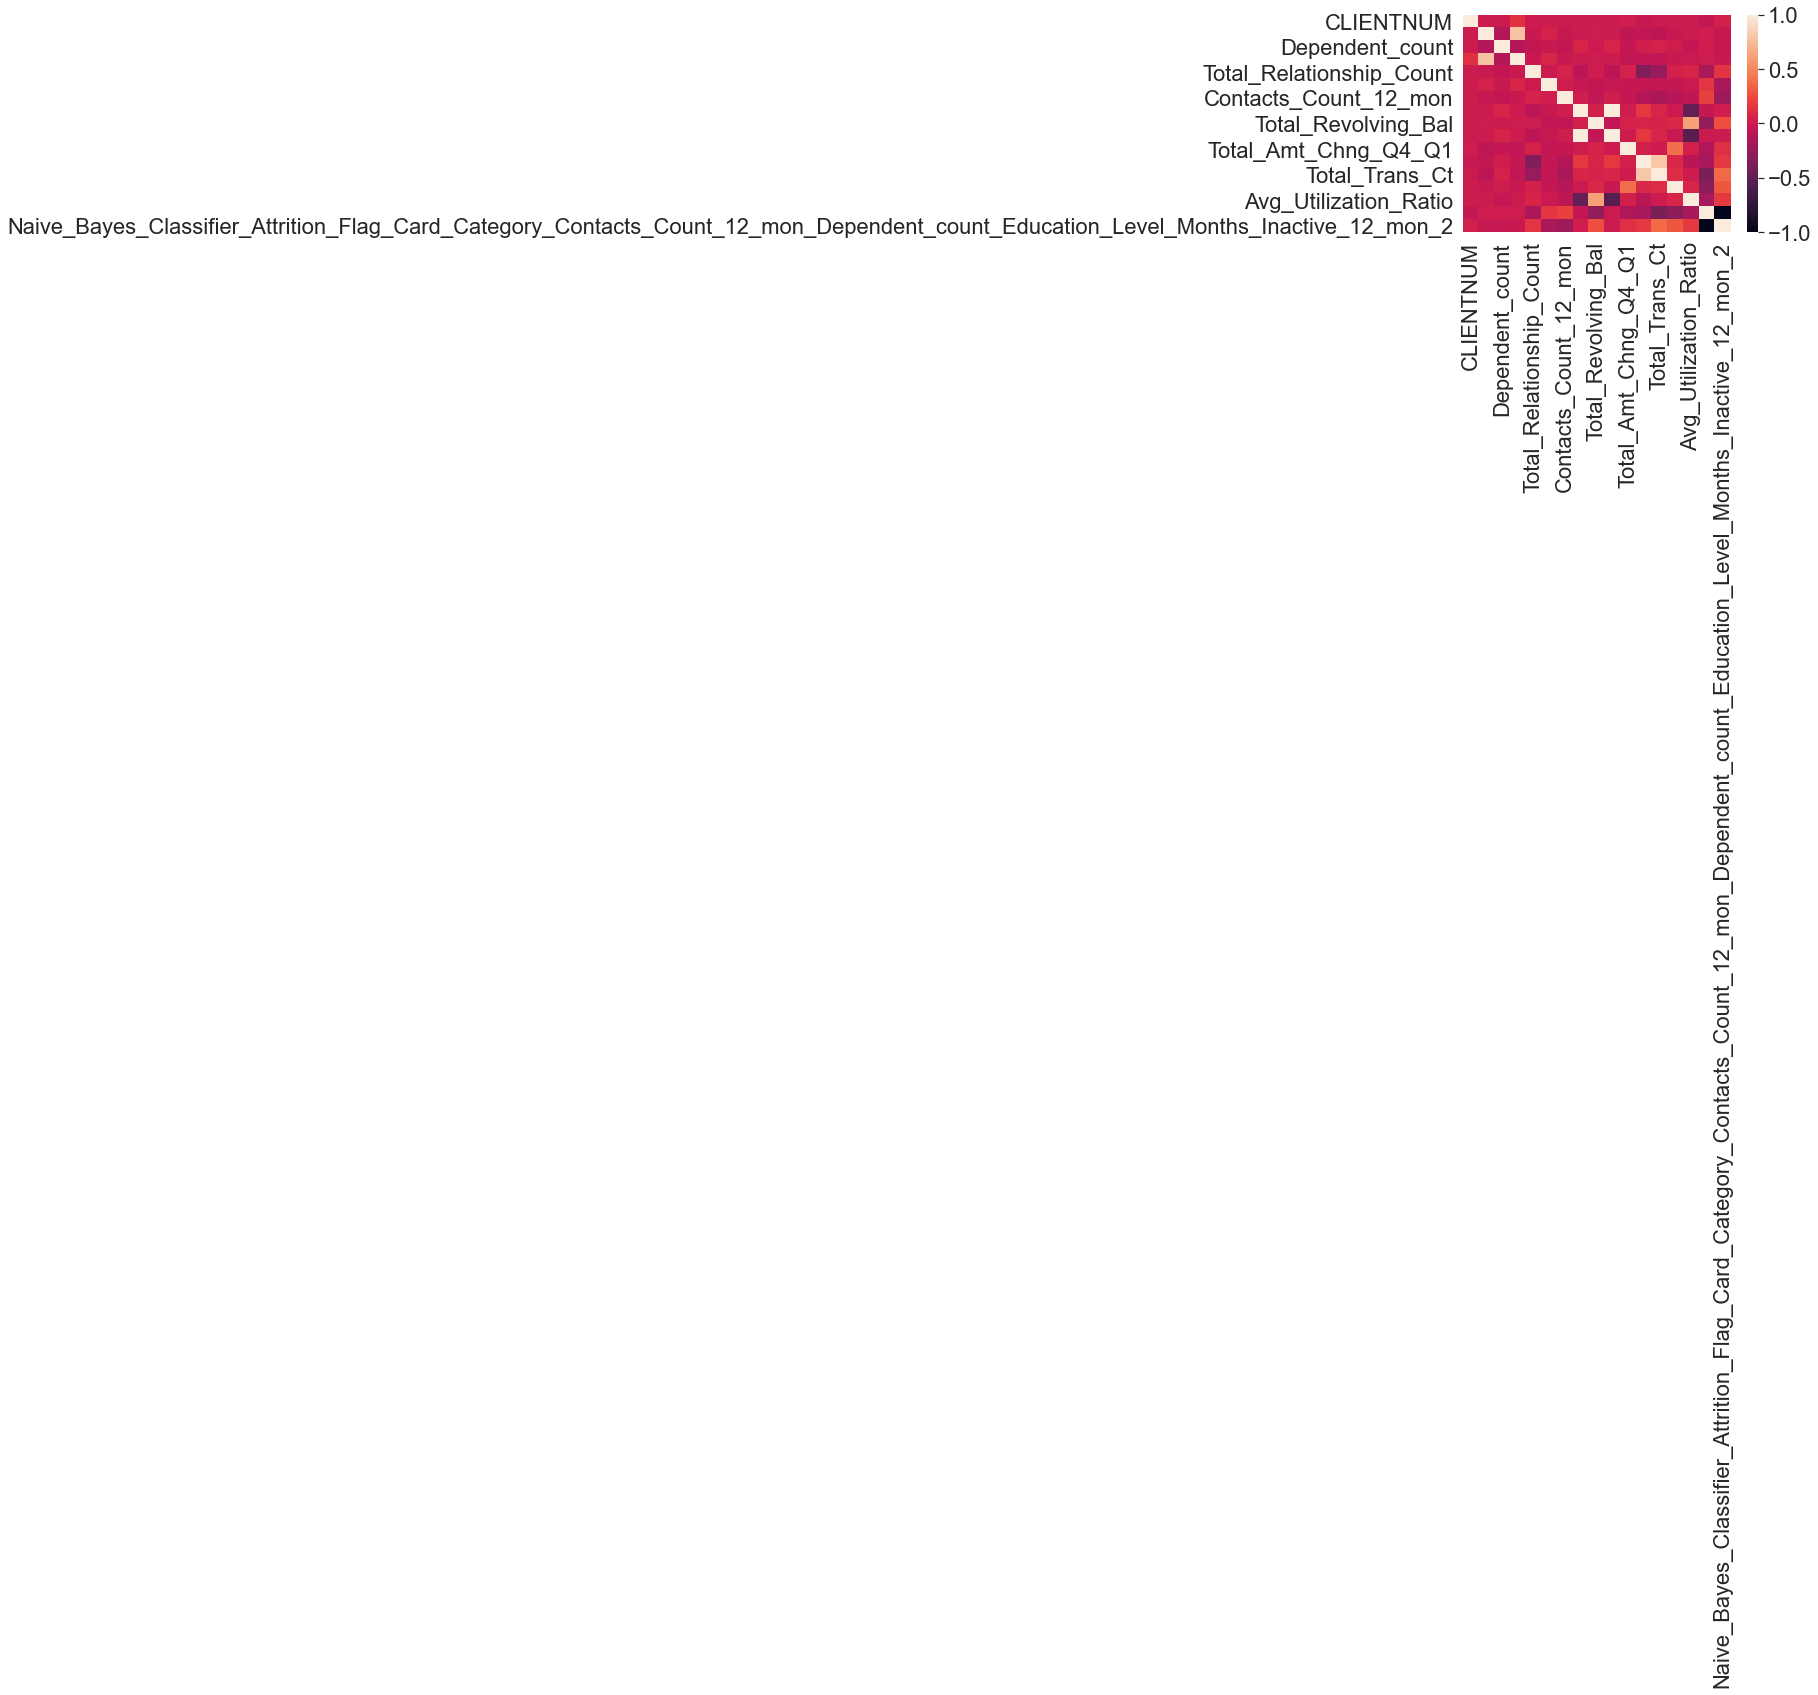

In [13]:
#correlation matrix
sea.heatmap(bank.corr())

In [14]:
#frequency
freg = bank["Gender"].value_counts()
print(freg)

F    5358
M    4769
Name: Gender, dtype: int64


In [15]:
bank.describe()
#print(bank.describe())


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [16]:
mean_array2 = []
mean = bank.mean()
for i in range(0,len(names)):
    try :
        mean_array2.append(mean[i])
    except IndexError:
        next 
        
print(mean_array2)

[739177606.3336625, 46.32596030413745, 2.3462032191172115, 35.928409203120374, 3.8125802310654686, 2.3411671768539546, 2.4553174681544387, 8631.953698034955, 1162.8140614199665, 7469.139636614989, 0.7599406536980349, 4404.086303939963, 64.85869457884863, 0.7122223758269972, 0.2748935518909845, 0.1599974639787795, 0.8400025708403278]


In [17]:
mean_array1 = []
for i in range(0,len(names)):
    try:
        var = bank[names[i]]
        ans = statistics.mean(var)
        mean_array1.append(ans)
        print('Mean of {0} = {1}'.format(names[i],ans))
    except TypeError:
        continue

Mean of CLIENTNUM = 739177606.3336625
Mean of Customer_Age = 46.32596030413745
Mean of Dependent_count = 2.3462032191172115
Mean of Months_on_book = 35.928409203120374
Mean of Total_Relationship_Count = 3.8125802310654686
Mean of Months_Inactive_12_mon = 2.3411671768539546
Mean of Contacts_Count_12_mon = 2.4553174681544387
Mean of Credit_Limit = 8631.953698034957
Mean of Total_Revolving_Bal = 1162.8140614199665
Mean of Avg_Open_To_Buy = 7469.139636614989
Mean of Total_Amt_Chng_Q4_Q1 = 0.759940653698035
Mean of Total_Trans_Amt = 4404.086303939963
Mean of Total_Trans_Ct = 64.85869457884863
Mean of Total_Ct_Chng_Q4_Q1 = 0.7122223758269971
Mean of Avg_Utilization_Ratio = 0.2748935518909845
Mean of Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 = 0.1599974639787795
Mean of Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 = 0.84

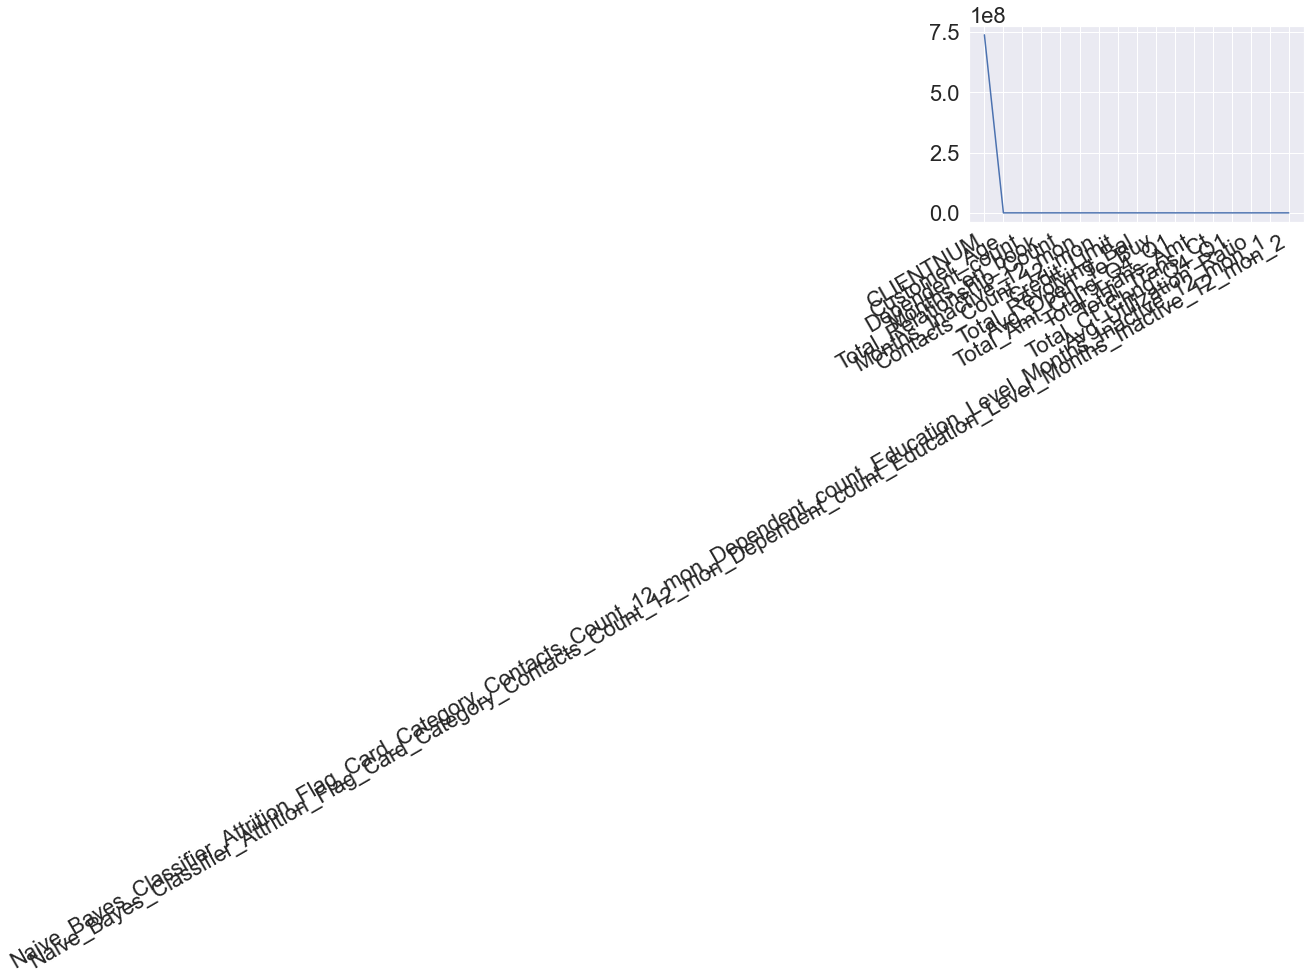

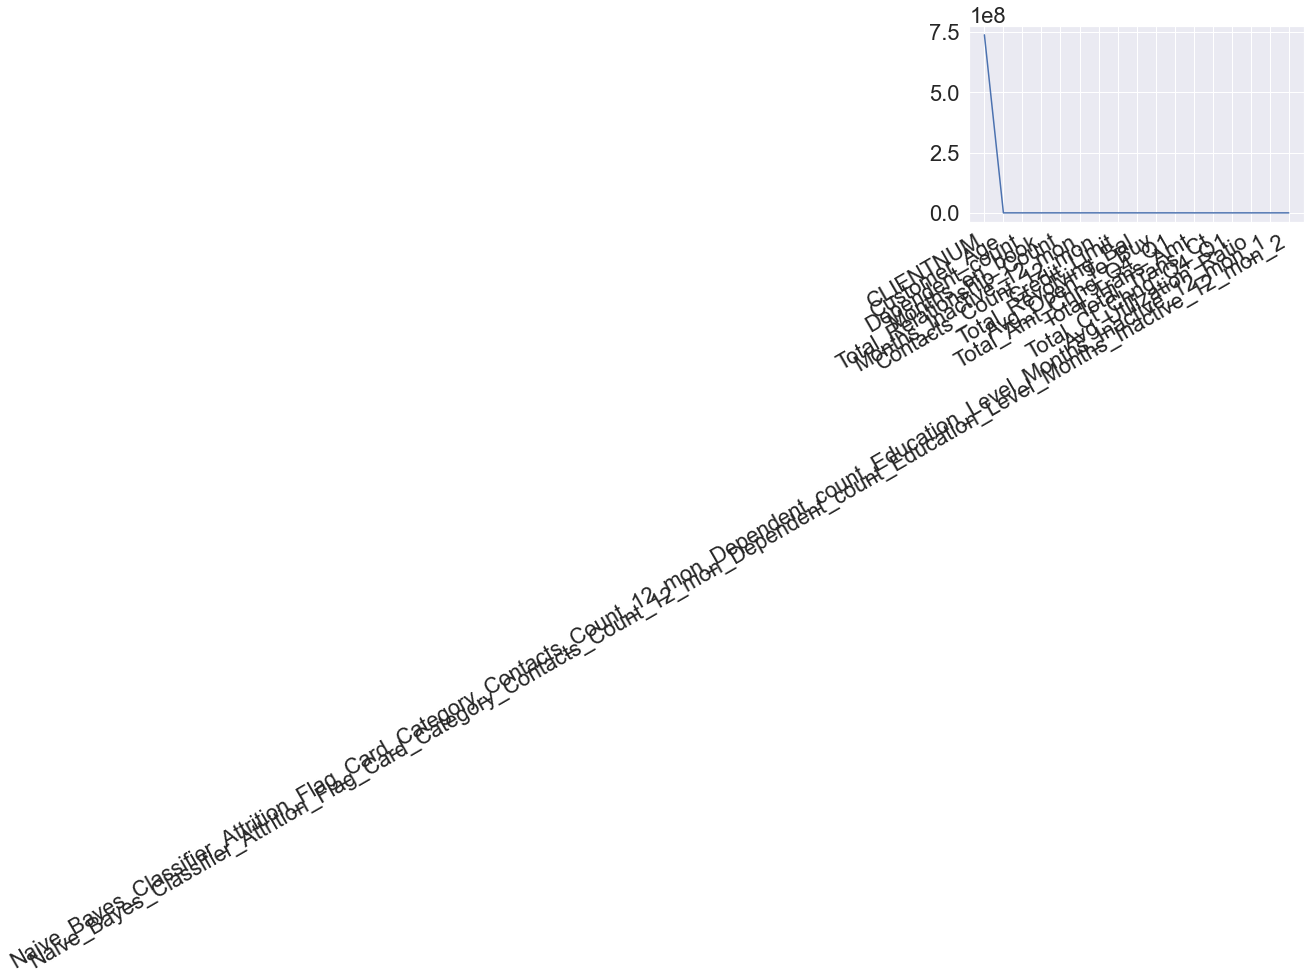

In [18]:
x = mean_array1
y = names2

mpl.plot(y,x) #просто рисует график с осями у, х
mpl.gcf().autofmt_xdate() #значения оси х рисует под углом 45 градусов
mpl.show()

x = mean_array2
y = names2

mpl.plot(y,x)
mpl.gcf().autofmt_xdate()
mpl.show()

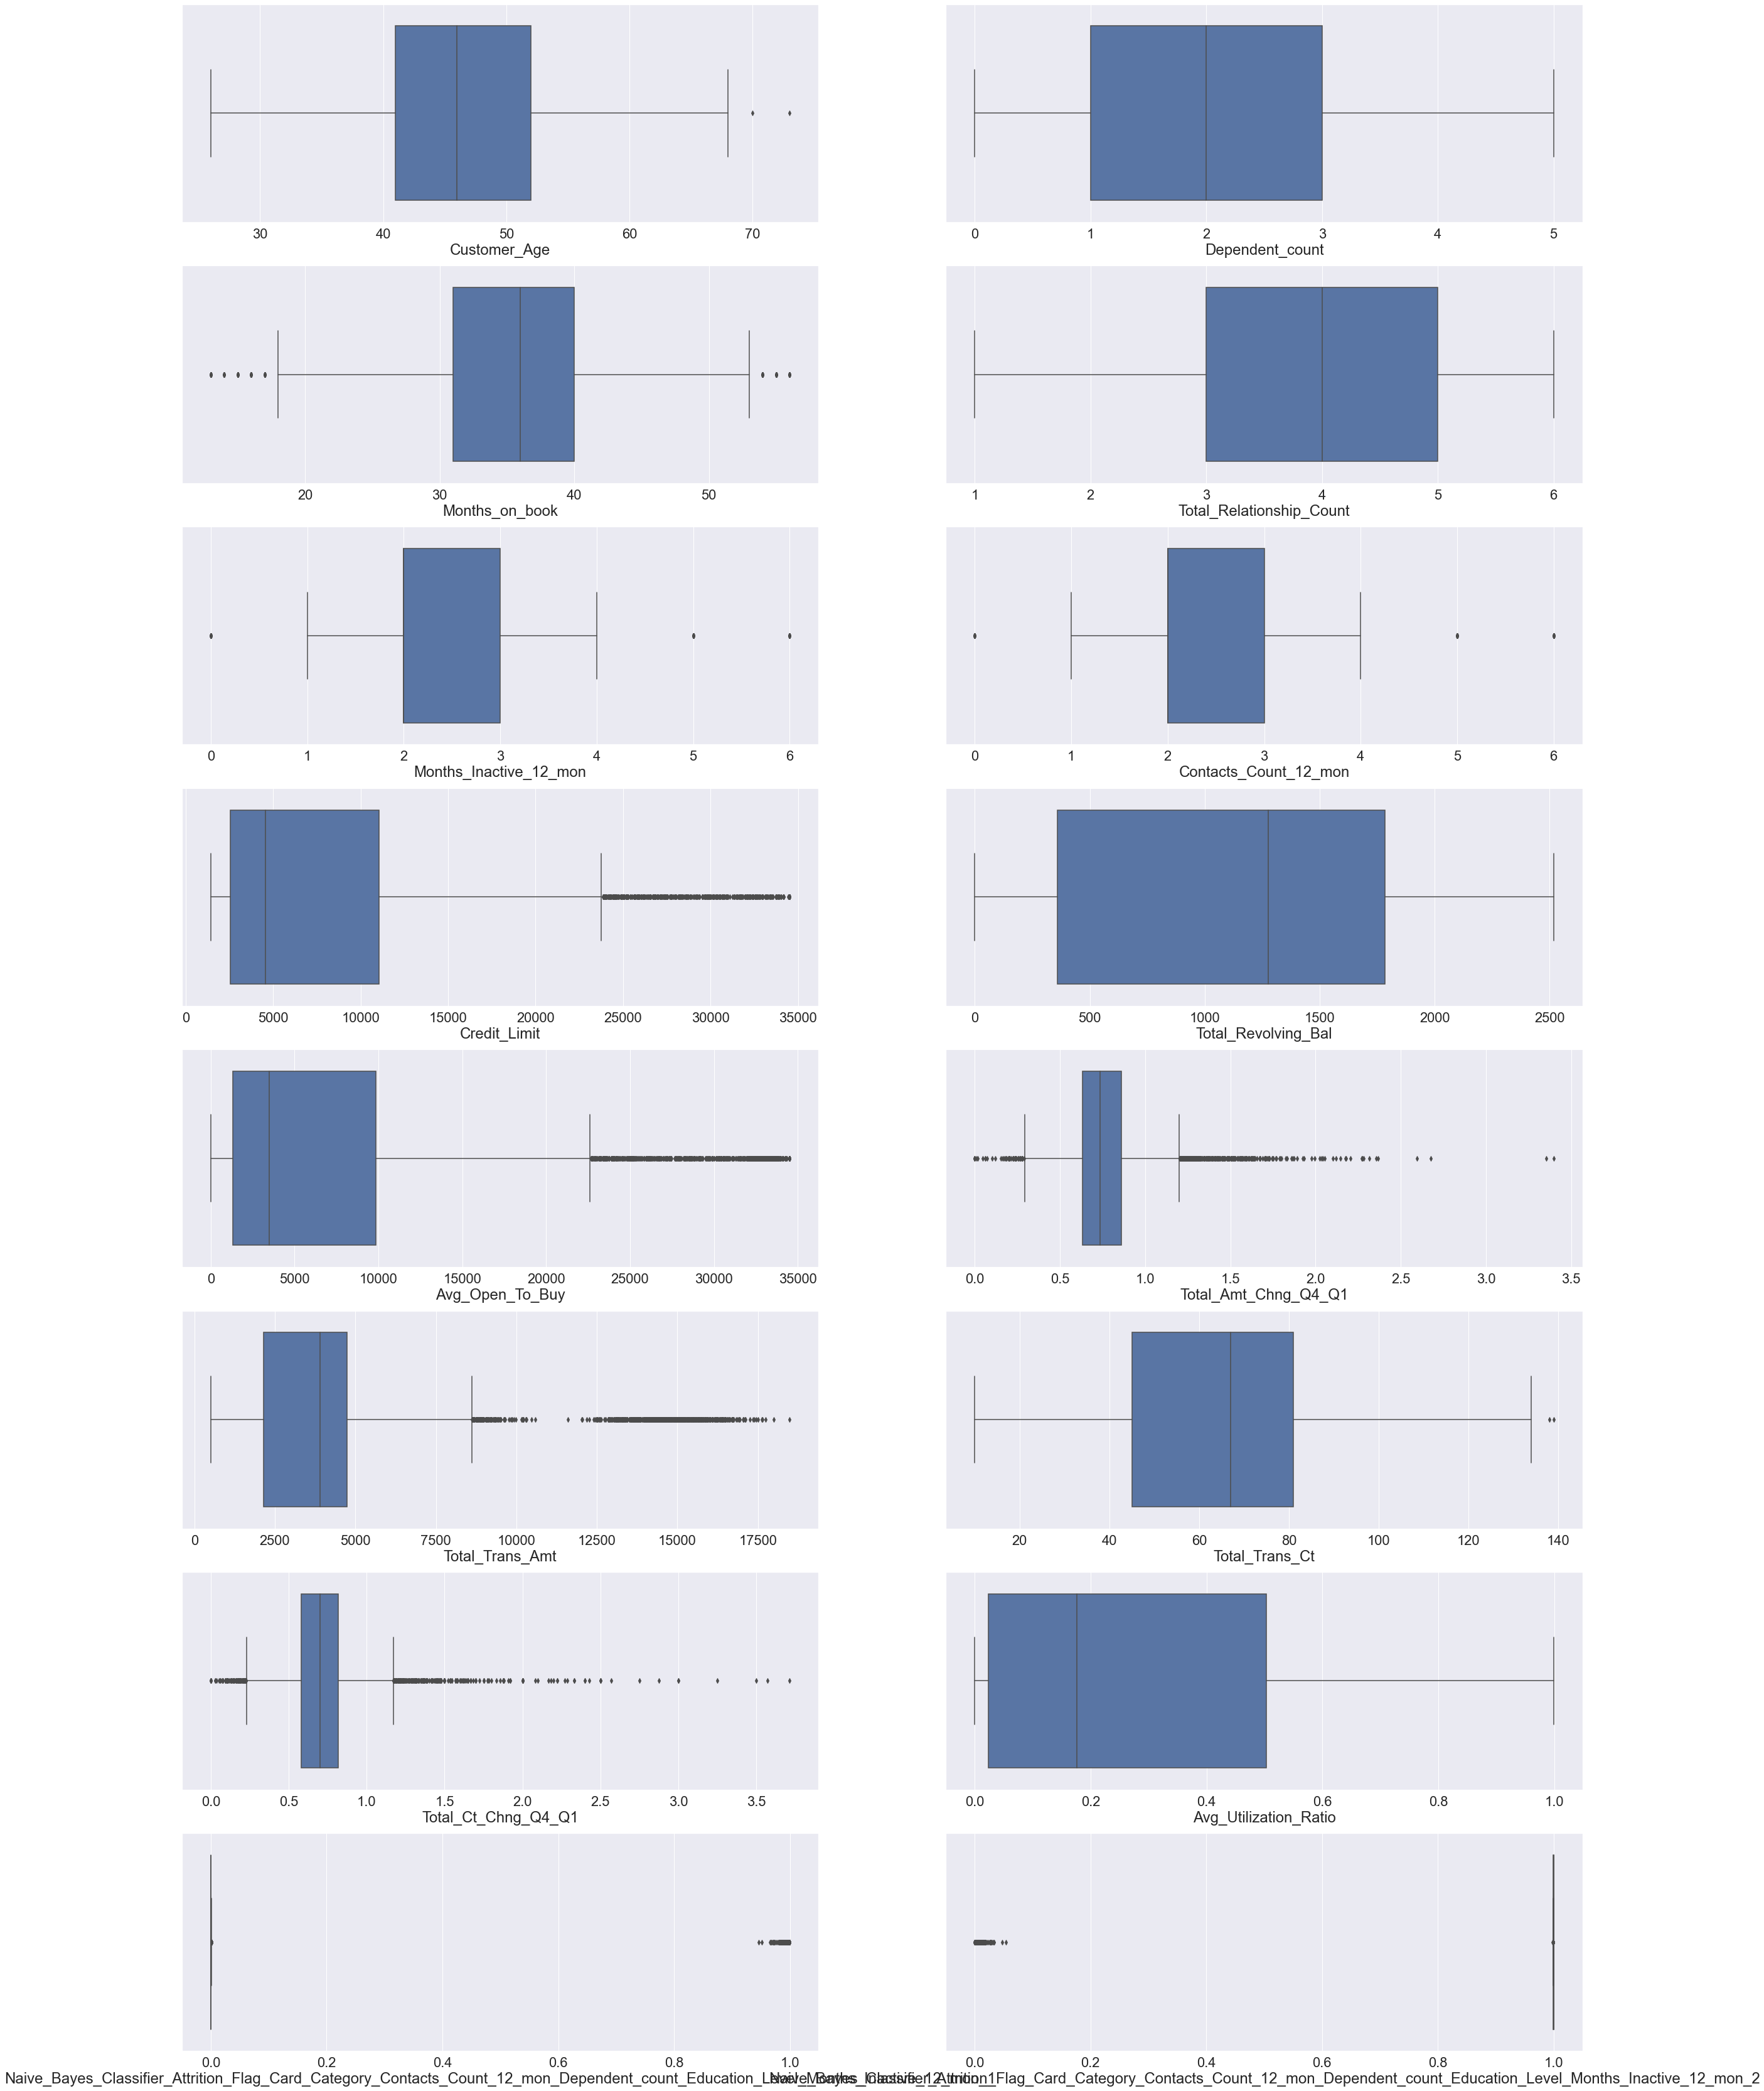

In [19]:
#check the correspondence of plots and statistical values
fig, axs = mpl.subplots(8, 2, figsize=(40, 60))
axes = [item for sublist in axs for item in sublist]
k = 0

for i in (2, 4) + tuple(range(9, 23)):
    sea.boxplot(data=bank, x=bank.columns[i], ax=axes[k])
    k += 1

mpl.show()